In [ ]:
!pip install pycaret
!pip install botorch
!pip install gpytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 73.3 MB/s eta 0:

In [ ]:
import sklearn
import scipy
import pycaret
import botorch
import torch
import gpytorch
import pandas as pd

In [ ]:
!pwd

/content


In [ ]:
#df=pd.read_csv("..\data_gen\data_to_modeling_v0.csv",sep='\t',dtype='float',index_col=0)
df=pd.read_csv("data_to_modeling_v0.csv",sep='\t',dtype='float',index_col=0)
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
284.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
285.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
286.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


In [ ]:
ignore_features=["depth","clearance_angle",
"d1","d2","d3","d4","d5","densidade",] #devido a erro no pycaret, vou fazer exclusão forçada das variáveis
df_1=df.drop(ignore_features,axis=1)

In [ ]:
df_1.isna().any()

vc                    False
rake_angle            False
expected_cut_force    False
A                     False
B                     False
C                     False
n                     False
m                     False
young_modulus         False
poisson_coef          False
dtype: bool

In [ ]:
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
284.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
285.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
286.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


# Configurando diferentes setups


|Setup|polynomial_features|normalize|pca|transform_target|remove_multicollinearity|feature_selection|n_features_to_select|
|-|-|-|-|-|-|-|-|
|1|False|False|False|False|True|False|-|
|2|True|True|False|False|True|False|-|
|3|True|True|True|False|True|True|5|
|4|True|True|False|True|True|True|10|
|5|True|True|True|True|True|True|10|

In [ ]:
from pycaret.regression import *


setup_1 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=False,

          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",

          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_2 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=True,

          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",

          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_3 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,

          pca=True,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",

          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_4 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,

          pca=False,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",

          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_5 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,

          pca=True,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",

          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

,Description,Value
0,Session id,504
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 15)"
5,Transformed train set shape,"(201, 15)"
6,Transformed test set shape,"(87, 15)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,8508
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 14)"
5,Transformed train set shape,"(201, 14)"
6,Transformed test set shape,"(87, 14)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,5966
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,4240
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,6824
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


# Modelagem com expansão nas features

In [ ]:
setup_1.compare_models()
setup_2.compare_models()
setup_3.compare_models()
setup_4.compare_models()
setup_5.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,242.2983,141898.7861,365.9444,0.9500,0.0837,0.0604,0.3950
lightgbm,Light Gradient Boosting Machine,249.0135,144665.6766,369.2710,0.9493,0.0860,0.0634,0.6650
ada,AdaBoost Regressor,274.3534,158245.3109,392.2527,0.9451,0.0872,0.0674,0.1720
rf,Random Forest Regressor,251.8010,169349.5757,398.9743,0.9405,0.0880,0.0615,0.4460
knn,K Neighbors Regressor,309.3069,192866.2367,430.3189,0.9340,0.1061,0.0801,0.2510
xgboost,Extreme Gradient Boosting,274.2456,189954.8598,423.5739,0.9333,0.0957,0.0684,0.1400
et,Extra Trees Regressor,265.3216,189929.6279,423.1824,0.9331,0.0931,0.0641,0.3550
dt,Decision Tree Regressor,278.2180,194583.6583,429.9223,0.9320,0.0965,0.0695,0.0700
llar,Lasso Least Angle Regression,351.4619,201542.2141,439.9762,0.9307,0.1065,0.0902,0.0880
en,Elastic Net,352.2827,201937.9227,440.3651,0.9305,0.1065,0.0905,0.0820


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,290.1457,193063.8416,428.7371,0.9297,0.0972,0.0715,0.4210
ada,AdaBoost Regressor,309.0661,194448.0413,432.7202,0.9291,0.0986,0.0771,0.1090
lightgbm,Light Gradient Boosting Machine,294.3827,202281.5769,440.1660,0.9269,0.0976,0.0705,0.4130
knn,K Neighbors Regressor,297.2747,199802.6824,434.6144,0.9269,0.0990,0.0741,0.1760
lasso,Lasso Regression,350.4583,214396.8703,456.1024,0.9221,0.1076,0.0903,0.1950
llar,Lasso Least Angle Regression,350.4824,214406.3555,456.1160,0.9221,0.1076,0.0903,0.0910
br,Bayesian Ridge,351.0334,214305.8773,456.0954,0.9221,0.1076,0.0905,0.0920
ridge,Ridge Regression,352.0155,214614.5703,456.3078,0.9220,0.1075,0.0909,0.1060
lr,Linear Regression,351.7543,215119.3961,457.1955,0.9219,0.1091,0.0912,0.3870
rf,Random Forest Regressor,302.1712,222478.4370,457.4171,0.9197,0.0999,0.0723,0.4400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,308.0782,204058.0469,447.4616,0.9268,0.1007,0.0749,0.1420
gbr,Gradient Boosting Regressor,287.8389,209825.7323,444.8172,0.9247,0.1032,0.0737,0.2540
rf,Random Forest Regressor,295.8202,217804.1102,458.8361,0.9223,0.1118,0.0787,0.4310
lightgbm,Light Gradient Boosting Machine,303.5268,223850.8581,466.7423,0.9209,0.1195,0.0840,0.2000
ada,AdaBoost Regressor,330.2038,225229.2429,467.2719,0.9201,0.1057,0.0812,0.1750
et,Extra Trees Regressor,292.5301,239175.7823,473.4730,0.9144,0.1115,0.0764,0.7620
xgboost,Extreme Gradient Boosting,297.0899,247623.2422,482.6377,0.9116,0.1136,0.0772,0.1670
dt,Decision Tree Regressor,309.6317,263339.6393,502.0541,0.9067,0.1220,0.0815,0.2200
ridge,Ridge Regression,461.0082,369386.5953,602.6094,0.8685,0.2113,0.1464,0.2800
br,Bayesian Ridge,459.2927,369536.4531,602.6168,0.8683,0.2133,0.1457,0.1220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,345.6258,231198.0047,477.7603,0.9162,0.1080,0.0846,0.2130
llar,Lasso Least Angle Regression,345.4730,231129.0266,477.6876,0.9162,0.1080,0.0845,0.3510
br,Bayesian Ridge,345.9832,231157.4312,477.7530,0.9162,0.1080,0.0847,0.1540
lasso,Lasso Regression,345.4737,231128.1781,477.6867,0.9162,0.1080,0.0845,0.1670
lar,Least Angle Regression,345.6263,231198.1109,477.7605,0.9162,0.1080,0.0846,0.1990
par,Passive Aggressive Regressor,345.6974,231732.6576,477.8265,0.9157,0.1082,0.0848,0.1500
ridge,Ridge Regression,354.3864,233195.4812,480.1251,0.9156,0.1102,0.0883,0.1630
lightgbm,Light Gradient Boosting Machine,344.5450,235738.0758,483.0197,0.9153,0.1098,0.0858,0.4600
gbr,Gradient Boosting Regressor,343.1249,235544.5827,482.7625,0.9152,0.1104,0.0851,0.4190
dt,Decision Tree Regressor,343.7334,236000.8578,483.2175,0.9150,0.1107,0.0854,0.1670


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,296.1918,202203.8328,438.6086,0.9209,0.0959,0.0711,0.1760
ada,AdaBoost Regressor,344.1774,230506.2910,466.8851,0.9077,0.1019,0.0815,0.1990
rf,Random Forest Regressor,312.2024,241275.3252,475.3918,0.9035,0.1037,0.0756,0.7350
lightgbm,Light Gradient Boosting Machine,328.2899,246628.5149,483.6041,0.9031,0.1179,0.0866,0.5330
gbr,Gradient Boosting Regressor,322.8423,253882.5967,490.7338,0.8975,0.1084,0.0788,0.2940
et,Extra Trees Regressor,327.0685,277684.5904,511.2738,0.8872,0.1108,0.0786,0.4790
xgboost,Extreme Gradient Boosting,332.9415,282125.0445,516.5756,0.8855,0.1124,0.0805,0.4770
dt,Decision Tree Regressor,349.4880,301609.3127,536.7289,0.8781,0.1180,0.0852,0.1740
lr,Linear Regression,627.3919,661752.6078,770.6321,0.7555,0.3589,0.2216,0.2020
ridge,Ridge Regression,634.8817,669251.4875,778.2476,0.7499,0.3985,0.2188,0.4400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [ ]:
regression_results = pd.concat([setup_1.pull().assign(setup=1)
                               ,setup_2.pull().assign(setup=2)
                               ,setup_3.pull().assign(setup=3)
                               ,setup_4.pull().assign(setup=4)
                               ,setup_5.pull().assign(setup=5)])
regression_results.drop('knn').sort_values("RMSE",ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),setup
gbr,Gradient Boosting Regressor,242.2983,1.418988e+05,365.9444,0.9500,0.0837,0.0604,0.395,1
lightgbm,Light Gradient Boosting Machine,249.0135,1.446657e+05,369.2710,0.9493,0.0860,0.0634,0.665,1
ada,AdaBoost Regressor,274.3534,1.582453e+05,392.2527,0.9451,0.0872,0.0674,0.172,1
rf,Random Forest Regressor,251.8010,1.693496e+05,398.9743,0.9405,0.0880,0.0615,0.446,1
et,Extra Trees Regressor,265.3216,1.899296e+05,423.1824,0.9331,0.0931,0.0641,0.355,1
...,...,...,...,...,...,...,...,...,...
omp,Orthogonal Matching Pursuit,1521.3181,3.087039e+06,1747.8670,-0.0265,0.5724,0.6442,0.081,1
dummy,Dummy Regressor,1580.8813,3.142297e+06,1762.1386,-0.0709,0.6033,0.7142,0.094,2
dummy,Dummy Regressor,1607.7345,3.231538e+06,1788.1598,-0.0598,0.6021,0.7145,0.147,1
dummy,Dummy Regressor,1608.1853,3.241534e+06,1797.3060,-0.0954,0.6266,0.7393,0.421,3


## Investigando Lasso

In [ ]:
lasso=setup_2.create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,344.7484,202820.5469,450.3560,0.9167,0.1115,0.0900
1,328.0540,253577.0469,503.5643,0.9299,0.1187,0.0887
2,397.7581,257488.4062,507.4332,0.9072,0.1137,0.0957
3,333.4830,207638.6562,455.6739,0.9233,0.1038,0.0875
4,441.3581,273602.5312,523.0703,0.8783,0.1110,0.0972
5,363.7367,240340.1719,490.2450,0.9254,0.1260,0.1104
6,282.0444,116862.2891,341.8513,0.9629,0.0752,0.0663
7,295.0424,134761.2500,367.0984,0.9500,0.0825,0.0712
8,252.0761,111696.1484,334.2097,0.9713,0.1101,0.0951


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Lasso(random_state=8508)

In [ ]:
setup_2.pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,344.7484,202820.5469,450.3560,0.9167,0.1115,0.0900
1,328.0540,253577.0469,503.5643,0.9299,0.1187,0.0887
2,397.7581,257488.4062,507.4332,0.9072,0.1137,0.0957
3,333.4830,207638.6562,455.6739,0.9233,0.1038,0.0875
4,441.3581,273602.5312,523.0703,0.8783,0.1110,0.0972
5,363.7367,240340.1719,490.2450,0.9254,0.1260,0.1104
6,282.0444,116862.2891,341.8513,0.9629,0.0752,0.0663
7,295.0424,134761.2500,367.0984,0.9500,0.0825,0.0712
8,252.0761,111696.1484,334.2097,0.9713,0.1101,0.0951


In [ ]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 1636.6615
rake_angle^2 : 131.4775
rake_angle*C : 58.9115
rake_angle*n : 16.8605
A*B : 1064.8020


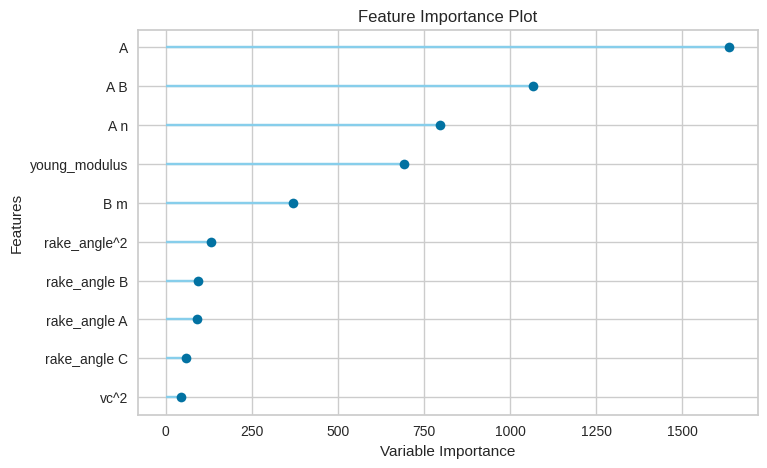

In [ ]:
setup_2.plot_model(lasso,"feature")

In [ ]:
lasso.feature_names_in_

array(['A', 'young_modulus', 'vc^2', 'rake_angle^2', 'rake_angle A',
       'rake_angle B', 'rake_angle C', 'rake_angle n', 'rake_angle m',
       'A B', 'A n', 'B m', 'B young_modulus'], dtype=object)

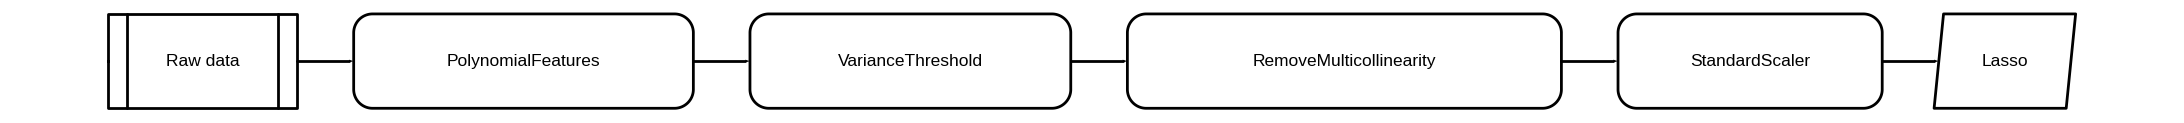

In [ ]:
setup_2.plot_model(lasso,"pipeline")

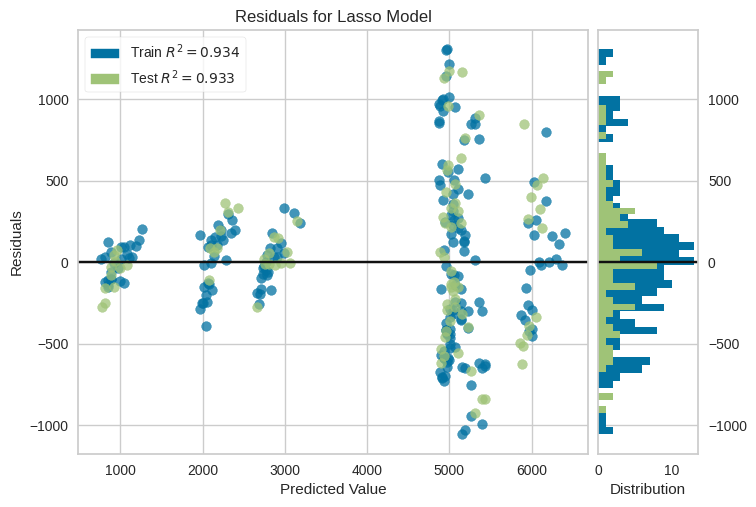

In [ ]:
setup_2.plot_model(lasso, plot='residuals')

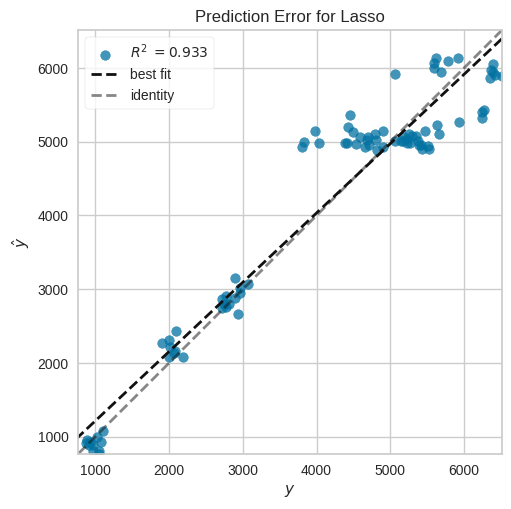

In [ ]:
setup_2.plot_model(lasso, plot='error')

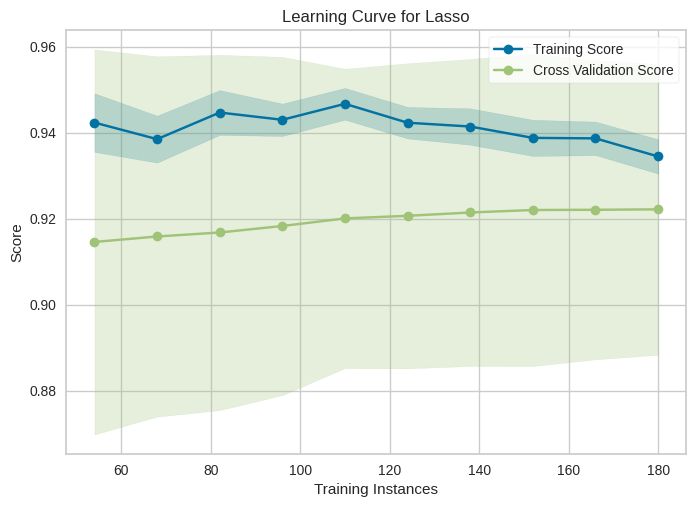

In [ ]:
setup_2.plot_model(lasso, plot='learning')

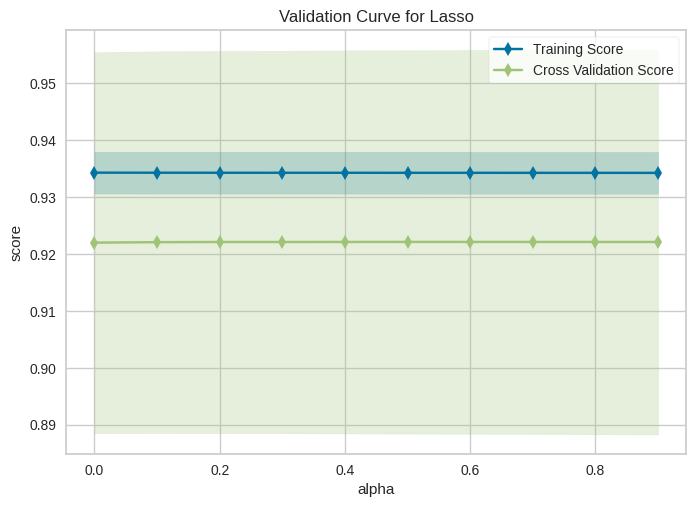

In [ ]:
setup_2.plot_model(lasso, plot='vc')

In [ ]:
setup_2.tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,337.4747,198516.0938,445.5515,0.9185,0.1089,0.0880
1,340.2097,258982.0000,508.9027,0.9284,0.1208,0.0938
2,395.4775,253683.2969,503.6698,0.9086,0.1130,0.0953
3,330.4988,210991.9062,459.3386,0.9221,0.1023,0.0846
4,446.7468,276071.2500,525.4248,0.8772,0.1120,0.0996
5,362.2551,239798.3281,489.6921,0.9256,0.1253,0.1090
6,272.2324,111403.5391,333.7717,0.9647,0.0741,0.0641
7,295.9214,134213.0000,366.3509,0.9502,0.0840,0.0727
8,248.1317,109284.5391,330.5821,0.9719,0.1063,0.0921


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Lasso(random_state=8508)

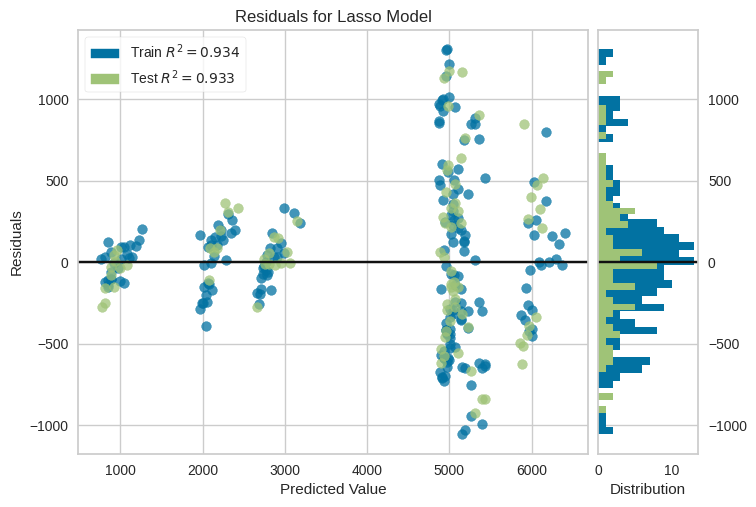

In [ ]:
setup_2.plot_model(lasso,"residuals")

In [ ]:
setup_2.plot_model(lasso,"parameter")

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,1000
positive,False
precompute,False
random_state,8508
selection,cyclic
tol,0.0001
warm_start,False


In [ ]:
setup_2.save_model(lasso,"models/lasso_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(threshold=0.01))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', Lasso(random_state=8508))]),
 'models/lasso_v0.pkl')

In [ ]:
setup_2.pipeline

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0.01))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('normalize',
                 TransformerWrapper(transformer=StandardScaler()))])

In [ ]:
setup_2.pipeline.transform(setup_2.train)

,A,young_modulus,expected_cut_force,vc^2,rake_angle^2,rake_angle A,rake_angle B,rake_angle C,rake_angle n,rake_angle m,A B,A n,B m,B young_modulus
161.0,-1.187892,-0.386056,2195.493896,-0.480505,2.117160,0.776236,2.823710,4.399448,2.234276,1.111298,0.318617,-0.128691,1.706003,1.684857
218.0,1.313843,2.598451,2817.578613,-1.251260,-0.781676,-0.928807,-0.334056,-0.203861,-0.555712,-1.439598,-1.320809,0.260325,-0.304629,-1.351518
245.0,1.313843,2.598451,2852.355469,1.416738,-0.781676,-0.928807,-0.334056,-0.203861,-0.555712,-1.439598,-1.320809,0.260325,-0.304629,-1.351518
79.0,-1.710006,-1.074788,1085.380859,-1.251260,0.909311,0.318524,-0.090967,0.111824,0.820823,0.624712,-2.056568,-0.718275,-1.640132,-1.670482
268.0,0.120085,-0.156478,4727.946777,-0.480505,0.909311,1.175731,1.216152,0.517038,0.513344,0.824508,0.491958,-0.458005,0.307512,0.278908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57.0,0.120085,-0.156478,3673.538818,0.408827,-1.023246,-0.345238,-0.347960,-0.232772,-0.227137,-0.322649,0.491958,-0.458005,0.307512,0.278908
276.0,0.120085,-0.156478,5525.639648,0.408827,-0.008653,0.795489,0.825124,0.329586,0.328224,0.537719,0.491958,-0.458005,0.307512,0.278908
171.0,-1.187892,-0.386056,2031.993774,1.416738,0.571114,-0.929009,-2.389993,-3.434384,-1.879506,-1.183017,0.318617,-0.128691,1.706003,1.684857
265.0,0.120085,-0.156478,3666.605713,-0.480505,-0.974932,0.035004,0.043068,-0.045319,-0.042017,-0.035860,0.491958,-0.458005,0.307512,0.278908


In [ ]:
lasso.feature_names_in_

array(['A', 'young_modulus', 'vc^2', 'rake_angle^2', 'rake_angle A',
       'rake_angle B', 'rake_angle C', 'rake_angle n', 'rake_angle m',
       'A B', 'A n', 'B m', 'B young_modulus'], dtype=object)

##### Investigação do p-valor dos coeficientes do LASSO

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config

set_config(transform_output="pandas")

pipeline=Pipeline([("poly",PolynomialFeatures(include_bias=False)),
                   ("variance",VarianceThreshold(threshold=0.01)),
                   ("scaler",StandardScaler())])
model=Lasso(random_state=4292)

train_X=pd.DataFrame(pipeline.fit_transform(setup_2.train.drop("expected_cut_force",axis=1)),
                   columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
train_y=setup_2.train[["expected_cut_force"]]

test_X=pd.DataFrame(pipeline.transform(setup_2.test.drop("expected_cut_force",axis=1)),
                  columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
test_y=setup_2.test[["expected_cut_force"]]

model.fit(train_X,train_y)

print(f"mean_absolute_error : {mean_absolute_error(test_y,model.predict(test_X))}")
print(f"mean_squared_error : {mean_squared_error(test_y,model.predict(test_X))}")
print(f"r2_score : {r2_score(test_y,model.predict(test_X))}")

mean_absolute_error : 342.1058349609375
mean_squared_error : 199502.296875
r2_score : 0.9332577857069245


In [ ]:
import statsmodels.api as sm

# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))

# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     244.1
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          2.49e-105
Time:                        18:10:12   Log-Likelihood:                -1513.7
No. Observations:                 201   AIC:                             3051.
Df Residuals:                     189   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4003.5692     32.822    121.979      0.000    3938.825    4068.313
A                1259.6952     31.252     40.307      0.000    1198.047    1321.344
young_modulus    -428.6861     27.794    -15.424      0.000    -483.511    -373.861
vc^2              -43.6092     32.905     -1.325      0.187    -108.518      21.300
rake_angle^2      134.5169     38.461      3.498      0.001      58.649     210.384
rake_angle A      128.6657    875.085      0.147      0.883   -1597.522    1854.854
rake_angle B     -289.1999    728.886     -0.397      0.692   -1726.997    1148.597
rake_angle C      217.0932    597.623      0.363      0.717    -961.775    1395.962
rake_angle n      -77.2640    397.413     -0.194      0.846    -861.200     706.672
rake_angle m      -79.7511    323.768     -0.246      0.806    -718.415     558.913
A B              1453.0391     33.404     43.499      0.000    1387.146    1518.932
A n              -752.8943     46.541    -16.177      0.000    -844.701    -661.088
B m              -438.3864     23.805    -18.416      0.000    -485.344    -391.429
B young_modulus  -213.6156     21.246    -10.055      0.000    -255.525    -171.706
==============================================================================
Omnibus:                       10.706   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.895
Skew:                          -0.520   Prob(JB):                      0.00431
Kurtosis:                       3.468   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
import numpy as np
frames = []
#model = sm.OLS(train_y, x)
for n in np.arange(0, 1, 0.05).tolist():
    results_fr = model.fit_regularized(alpha=n,L1_wt=1, start_params=result.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model,
                                                           results_fr.params,
                                                           model.normalized_cov_params
                                                        )
    frames.append(np.append(results_fr.params, results_fr_fit.ssr))

    df = pd.DataFrame(frames, columns=list(x.columns) + ['ssr*'])
df.index=np.arange(0, 1, 0.05).tolist()
df.index.name = 'alpha*'
df.T

alpha*,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
const,4.003569e+03,4.003519e+03,4.003469e+03,4.003419e+03,4.003369e+03,4.003319e+03,4.003269e+03,4.003219e+03,4.003169e+03,4.003119e+03,4.003069e+03,4.003019e+03,4.002969e+03,4.002919e+03,4.002869e+03,4.002819e+03,4.002769e+03,4.002719e+03,4.002669e+03,4.002619e+03
A,1.259695e+03,1.259305e+03,1.258916e+03,1.258526e+03,1.258136e+03,1.257746e+03,1.257357e+03,1.256967e+03,1.256577e+03,1.256187e+03,1.255798e+03,1.255408e+03,1.255018e+03,1.254628e+03,1.254239e+03,1.253849e+03,1.253459e+03,1.253069e+03,1.252680e+03,1.252290e+03
young_modulus,-4.286861e+02,-4.281259e+02,-4.275656e+02,-4.270054e+02,-4.264452e+02,-4.258849e+02,-4.253247e+02,-4.247644e+02,-4.242042e+02,-4.236440e+02,-4.230837e+02,-4.225235e+02,-4.219632e+02,-4.214030e+02,-4.208427e+02,-4.202825e+02,-4.197223e+02,-4.191620e+02,-4.186018e+02,-4.180415e+02
vc^2,-4.360917e+01,-4.357351e+01,-4.353785e+01,-4.350219e+01,-4.346653e+01,-4.343087e+01,-4.339521e+01,-4.335955e+01,-4.332389e+01,-4.328823e+01,-4.325257e+01,-4.321691e+01,-4.318125e+01,-4.314559e+01,-4.310993e+01,-4.307427e+01,-4.303861e+01,-4.300295e+01,-4.296729e+01,-4.293162e+01
rake_angle^2,1.345169e+02,1.343814e+02,1.342459e+02,1.341104e+02,1.339750e+02,1.338395e+02,1.337040e+02,1.335685e+02,1.334330e+02,1.332976e+02,1.331621e+02,1.330266e+02,1.328911e+02,1.327556e+02,1.326202e+02,1.324847e+02,1.323492e+02,1.322137e+02,1.320782e+02,1.319428e+02
rake_angle A,1.286657e+02,1.223648e+02,1.160639e+02,1.097630e+02,1.034620e+02,9.716114e+01,9.086022e+01,8.455931e+01,7.825840e+01,7.195749e+01,6.565658e+01,5.935567e+01,5.305475e+01,4.675384e+01,4.045293e+01,3.415202e+01,2.785111e+01,2.155020e+01,1.524929e+01,8.948374e+00
rake_angle B,-2.891999e+02,-2.837532e+02,-2.783065e+02,-2.728598e+02,-2.674130e+02,-2.619663e+02,-2.565196e+02,-2.510728e+02,-2.456261e+02,-2.401794e+02,-2.347327e+02,-2.292859e+02,-2.238392e+02,-2.183925e+02,-2.129457e+02,-2.074990e+02,-2.020523e+02,-1.966055e+02,-1.911588e+02,-1.857121e+02
rake_angle C,2.170932e+02,2.125532e+02,2.080132e+02,2.034732e+02,1.989332e+02,1.943932e+02,1.898532e+02,1.853132e+02,1.807732e+02,1.762332e+02,1.716932e+02,1.671532e+02,1.626132e+02,1.580732e+02,1.535332e+02,1.489932e+02,1.444532e+02,1.399133e+02,1.353733e+02,1.308333e+02
rake_angle n,-7.726401e+01,-7.432097e+01,-7.137792e+01,-6.843488e+01,-6.549184e+01,-6.254879e+01,-5.960575e+01,-5.666271e+01,-5.371966e+01,-5.077662e+01,-4.783358e+01,-4.489053e+01,-4.194749e+01,-3.900445e+01,-3.606141e+01,-3.311836e+01,-3.017532e+01,-2.723228e+01,-2.428923e+01,-2.134619e+01
rake_angle m,-7.975109e+01,-7.744854e+01,-7.514599e+01,-7.284344e+01,-7.054089e+01,-6.823834e+01,-6.593579e+01,-6.363324e+01,-6.133069e+01,-5.902814e+01,-5.672559e+01,-5.442304e+01,-5.212049e+01,-4.981794e+01,-4.751539e+01,-4.521284e+01,-4.291029e+01,-4.060774e+01,-3.830519e+01,-3.600264e+01


In [ ]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model,
                                              results_fr.params,
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          2.55e-105
Time:                        18:10:20   Log-Likelihood:                -1513.7
No. Observations:                 201   AIC:                             3051.
Df Residuals:                     189   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4002.5692     32.826    121.932      0.000    3937.817    4067.322
A                1251.9000     31.257     40.052      0.000    1190.244    1313.556
young_modulus    -417.4813     27.797    -15.019      0.000    -472.314    -362.649
vc^2              -42.8960     32.910     -1.303      0.194    -107.813      22.021
rake_angle^2      131.8073     38.466      3.427      0.001      55.930     207.685
rake_angle A        2.6475    875.199      0.003      0.998   -1723.766    1729.061
rake_angle B     -180.2654    728.981     -0.247      0.805   -1618.250    1257.719
rake_angle C      126.2933    597.701      0.211      0.833   -1052.729    1305.316
rake_angle n      -18.4031    397.465     -0.046      0.963    -802.441     765.635
rake_angle m      -33.7001    323.811     -0.104      0.917    -672.447     605.047
A B              1450.7242     33.409     43.424      0.000    1384.822    1516.626
A n              -751.1495     46.547    -16.137      0.000    -842.968    -659.331
B m              -450.3051     23.808    -18.914      0.000    -497.269    -403.341
B young_modulus  -197.7840     21.249     -9.308      0.000    -239.699    -155.869
==============================================================================
Omnibus:                       10.111   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.215
Skew:                          -0.500   Prob(JB):                      0.00605
Kurtosis:                       3.469   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Excluindo mais variáveis dado a informação de relevância do p-valor

In [ ]:
import statsmodels.api as sm

# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))[[
    "A",
    "young_modulus",
    "rake_angle^2",
    "A B",
    "A n",
    "B m",
    "B young_modulus"
]]

# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

In [ ]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model,
                                              results_fr.params,
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     expected_cut_force   R-squared (uncentered):                  -4.356
Model:                            OLS   Adj. R-squared (uncentered):             -4.493
Method:                 Least Squares   F-statistic:                             -31.88
Date:                Sat, 19 Aug 2023   Prob (F-statistic):                        1.00
Time:                        18:10:21   Log-Likelihood:                         -2138.9
No. Observations:                 201   AIC:                                      4288.
Df Residuals:                     196   BIC:                                      4304.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
A               -1.405e+11   2.54e+10     -5.538      0.000   -1.91e+11   -9.05e+10
young_modulus    1.216e+11    2.2e+10      5.538      0.000    7.83e+10    1.65e+11
rake_angle^2     -802.5479    725.431     -1.106      0.270   -2233.200     628.104
A B              1.298e+11   2.34e+10      5.538      0.000    8.36e+10    1.76e+11
A n             -1.919e+09   3.47e+08     -5.538      0.000    -2.6e+09   -1.24e+09
B m             -8.356e+10   1.51e+10     -5.538      0.000   -1.13e+11   -5.38e+10
B young_modulus -1.133e+10   2.05e+09     -5.538      0.000   -1.54e+10   -7.29e+09
==============================================================================
Omnibus:                        5.542   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                8.066
Skew:                           0.064   Prob(JB):                       0.0177
Kurtosis:                       3.973   Cond. No.                     8.28e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Investigando LightGBM

In [ ]:
#df=pd.read_csv("..\data_gen\data_to_modeling_v0.csv",sep='\t',dtype='float',index_col=0)
df=pd.read_csv("data_to_modeling_v0.csv",sep='\t',dtype='float',index_col=0)
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
284.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
285.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
286.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


In [ ]:
lgbm=setup_2.create_model("lightgbm",importance_type="gain")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,325.1548,206174.2098,454.0641,0.9153,0.0918,0.0726
1,315.5231,199200.2521,446.3186,0.9450,0.1211,0.0909
2,380.3859,379254.9179,615.8368,0.8633,0.1234,0.0769
3,340.6075,259128.9765,509.0471,0.9043,0.1057,0.0772
4,283.1493,149266.6358,386.3504,0.9336,0.0994,0.0731
5,227.5732,151728.1285,389.5229,0.9529,0.1030,0.0730
6,310.2943,196953.0263,443.7939,0.9376,0.0813,0.0630
7,196.5616,132527.8219,364.0437,0.9508,0.0747,0.0463
8,152.0234,70317.9752,265.1754,0.9819,0.0677,0.0458


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lgbm

LGBMRegressor(importance_type='gain', n_jobs=-1, random_state=8508)

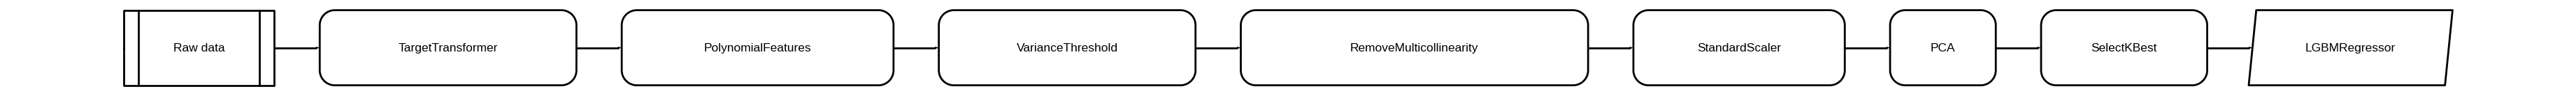

In [ ]:
plot_model(lgbm, "pipeline")

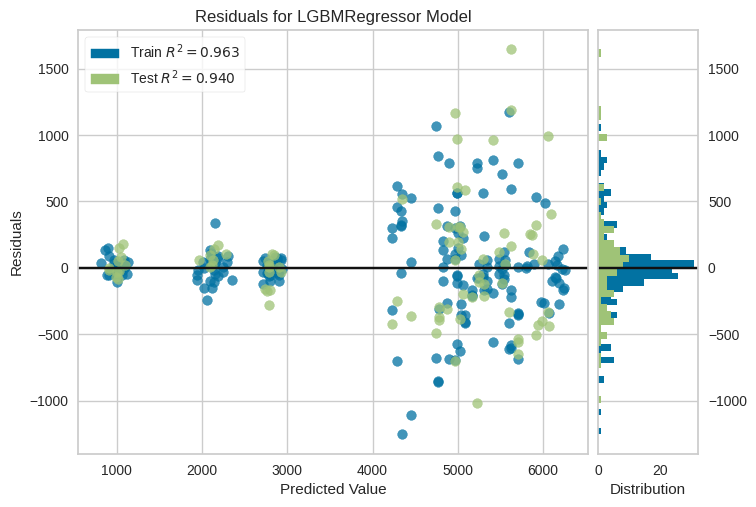

In [ ]:
setup_2.plot_model(lgbm, plot='residuals')

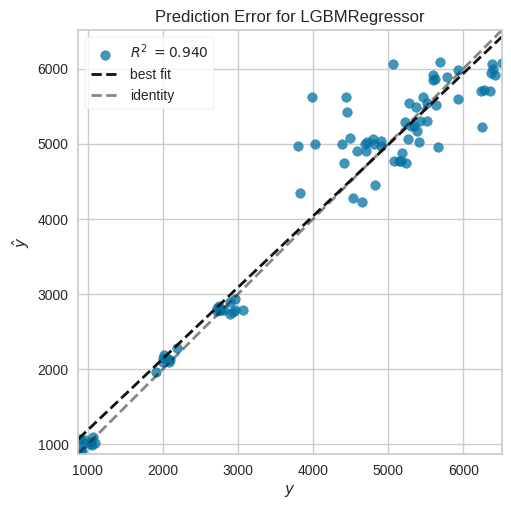

In [ ]:
setup_2.plot_model(lgbm, plot='error')

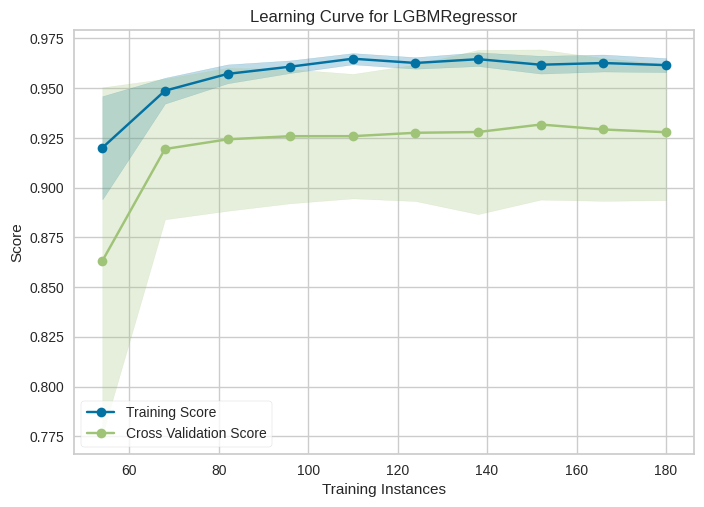

In [ ]:
setup_2.plot_model(lgbm, plot='learning')

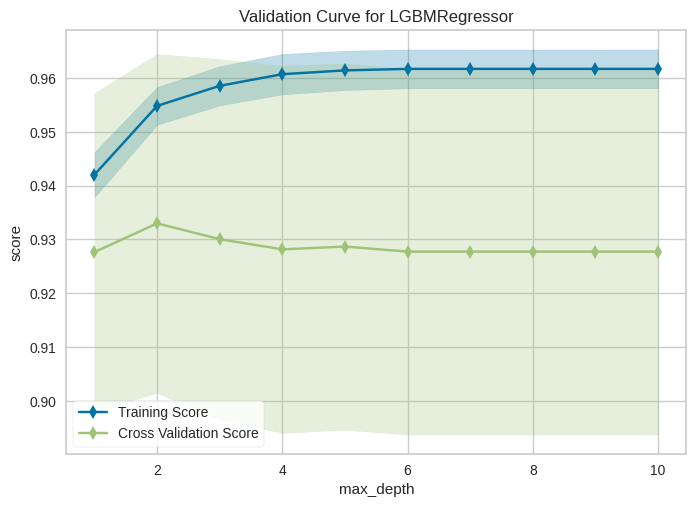

In [ ]:
setup_2.plot_model(lgbm, plot='vc')

In [ ]:
lgbm.importance_type

'gain'

In [ ]:
import plotly.express as px
df_importance = pd.DataFrame.from_dict({"Features":lgbm.feature_name_,
                                        "Values":lgbm.feature_importances_})
df_importance["Features"]=(df_importance["Features"].str.replace(" ","*")
                                                    .str.replace("young_modulus","Módulo de Elasticidade")
                                                    .str.replace("rake_angle","Ângulo de saída")
                                                    .str.replace("vc","Velocidade de corte")
                                                    .str.replace("_","^")
)
fig = px.bar(df_importance.sort_values("Values",ascending=False), x='Features', y='Values')

fig.update_layout(
        yaxis_title='Redução total no Erro Quadrático quando por variável',
        title=f'Importância das variáveis de entrada para o modelo LGBM',
        hovermode="x"
    )

fig.show()

In [ ]:
save_model(lgbm,"models/lgbm_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=Varianc...
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('pca', TransformerWrapper(exclude=[], transformer=PCA())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectKBest(k=5,
                                                             score_func=<function f_regression at 0